In [3]:
# importing the pandas module for
# data frame
import pandas as pd


# load the data set into train variable.
train = pd.read_csv('vehicles.csv')

# display top 5 values of data set
train.head()

,DateTime,Vehicles
0,2023-01-01 00:00:00,23
1,2023-01-01 01:00:00,15
2,2023-01-01 02:00:00,22
3,2023-01-01 03:00:00,27
4,2023-01-01 04:00:00,17


In [4]:
# function to get all data from time stamp

# get date
def get_dom(dt):
	return dt.day

# get week day
def get_weekday(dt):
	return dt.weekday()

# get hour
def get_hour(dt):
	return dt.hour

# get year
def get_year(dt):
	return dt.year

# get month
def get_month(dt):
	return dt.month

# get year day
def get_dayofyear(dt):
	return dt.dayofyear

# get year week
def get_weekofyear(dt):
	return dt.weekofyear


train['DateTime'] = train['DateTime'].map(pd.to_datetime)
train['date'] = train['DateTime'].map(get_dom)
train['weekday'] = train['DateTime'].map(get_weekday)
train['hour'] = train['DateTime'].map(get_hour)
train['month'] = train['DateTime'].map(get_month)
train['year'] = train['DateTime'].map(get_year)
train['dayofyear'] = train['DateTime'].map(get_dayofyear)
train['weekofyear'] = train['DateTime'].map(get_weekofyear)

# display
train.head()

,DateTime,Vehicles,date,weekday,hour,month,year,dayofyear,weekofyear
0,2023-01-01 00:00:00,23,1,6,0,1,2023,1,52
1,2023-01-01 01:00:00,15,1,6,1,1,2023,1,52
2,2023-01-01 02:00:00,22,1,6,2,1,2023,1,52
3,2023-01-01 03:00:00,27,1,6,3,1,2023,1,52
4,2023-01-01 04:00:00,17,1,6,4,1,2023,1,52


In [13]:
# Only drop DateTime if it exists
if 'DateTime' in train.columns:
    train = train.drop(['DateTime'], axis=1)

# Separate features and target
train1 = train.drop(['Vehicles'], axis=1)
target = train['Vehicles']

print(train1.head())
target.head()


   date  weekday  hour  month  year  dayofyear  weekofyear
0     1        6     0      1  2023          1          52
1     1        6     1      1  2023          1          52
2     1        6     2      1  2023          1          52
3     1        6     3      1  2023          1          52
4     1        6     4      1  2023          1          52


0    23
1    15
2    22
3    27
4    17
Name: Vehicles, dtype: int64

In [15]:
# Use the same feature names as train1
sample_input = pd.DataFrame([[11,6,0,1,2015,11,2]], columns=train1.columns)

# Predict
m1.predict(sample_input)


array([20.59])

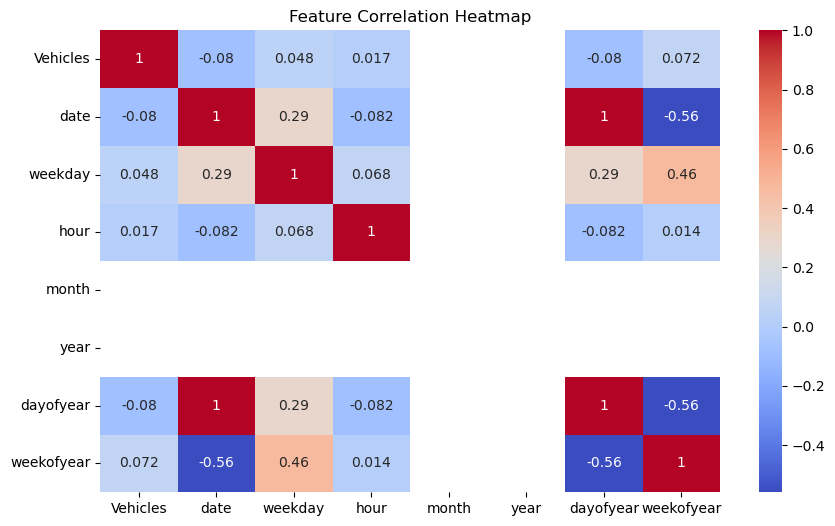

In [9]:

import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [17]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train1, target, test_size=0.2, random_state=42)


In [18]:

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [19]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Linear Regression Predictions
lr_pred = lr.predict(X_test)

# Random Forest Predictions
rf_pred = rf.predict(X_test)

# Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} Evaluation:")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("R2 Score:", r2_score(y_true, y_pred))
    print("-"*30)

evaluate_model(y_test, lr_pred, "Linear Regression")
evaluate_model(y_test, rf_pred, "Random Forest")


Linear Regression Evaluation:
MAE: 6.442182972550363
MSE: 60.15711016518397
R2 Score: -0.1148463707409928
------------------------------
Random Forest Evaluation:
MAE: 4.847499999999999
MSE: 37.33449
R2 Score: 0.308108042994811
------------------------------


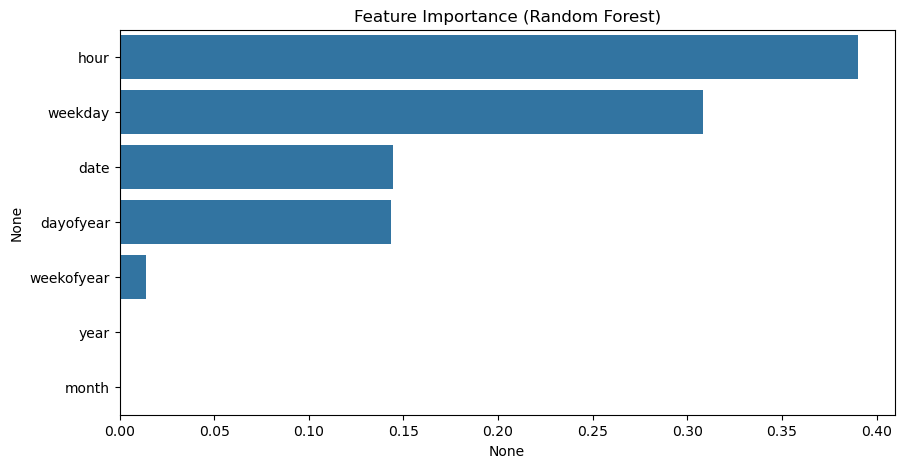

In [20]:

# Feature Importance
importances = rf.feature_importances_
feat_names = X_train.columns

feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importance (Random Forest)")
plt.show()


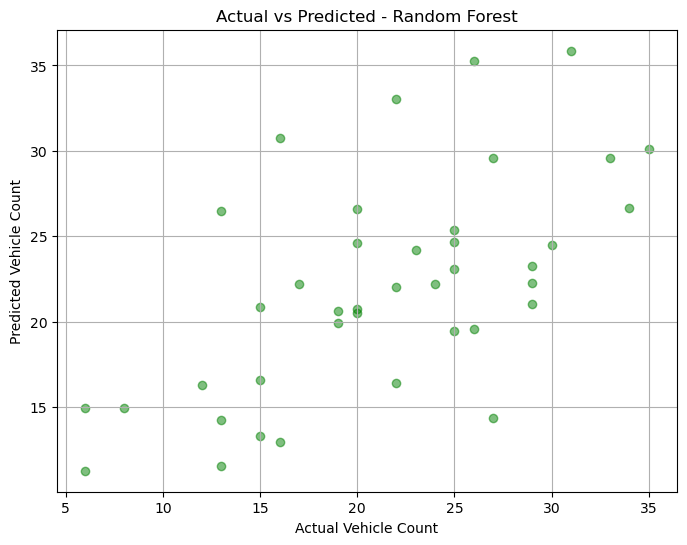

In [21]:

# Actual vs Predicted Plot for Random Forest
plt.figure(figsize=(8,6))
plt.scatter(y_test, rf_pred, alpha=0.5, color='green')
plt.xlabel("Actual Vehicle Count")
plt.ylabel("Predicted Vehicle Count")
plt.title("Actual vs Predicted - Random Forest")
plt.grid(True)
plt.show()
